### Excercise 3:
In this tutorial, we will explore the LOFAR interferometric data.
By the end of this tutorial you will be able to:
1. Plot the interferometric image of the Sun at a certain time and frequency.
2. Make a `sunpy` map of the output solar image.
3. Extract the brightness temperature at a certain point in the map.

The `fits` data file should be stored at `./data/` folder.

First we start by importing the required modules.

In [1]:
import sys
sys.path.insert(1, '..') # make sure to use the code in this repo

import numpy as np
import lofarSun
import matplotlib.pyplot as plt
from lofarSun import IM

%load_ext autoreload 
%autoreload 2

/opt/conda/envs/lofarsun/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Load the cleaned image `fits` data file.

In [2]:
lofardata = IM.IMdata()
lofardata.load_fits('./data/L700169_SAP000_SB045_18632-image.fits')

Plot the image of the radio Sun.

The color represents the distribution of brightness temperature ($T_b$) in the unit of Kelvin.

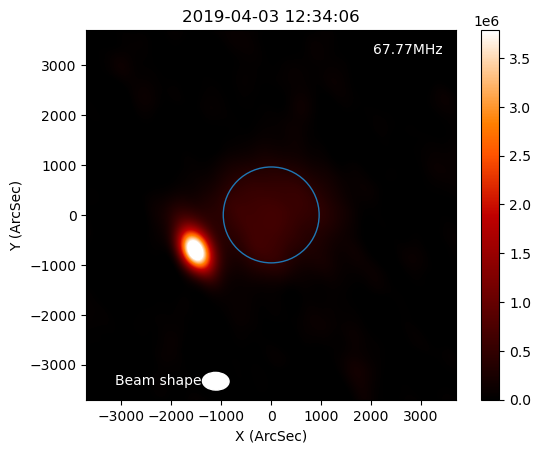

In [3]:
lofardata.plot_image(fov=3700)
plt.show()

If necessary, convert the image to a standard `sunpy` map.

In [4]:
lofarmap = lofardata.make_map()

Observatory,LOFAR
Instrument,
Detector,
Measurement,67.767333984375 MHz
Wavelength,67.767333984375 MHz
Observation Date,2019-04-03 12:34:06
Exposure Time,Unknown
Dimension,[501. 501.] pix
Coordinate System,helioprojective
Scale,[10. 10.] arcsec / pix
Reference Pixel,[243.72767447 249.16945077] pix

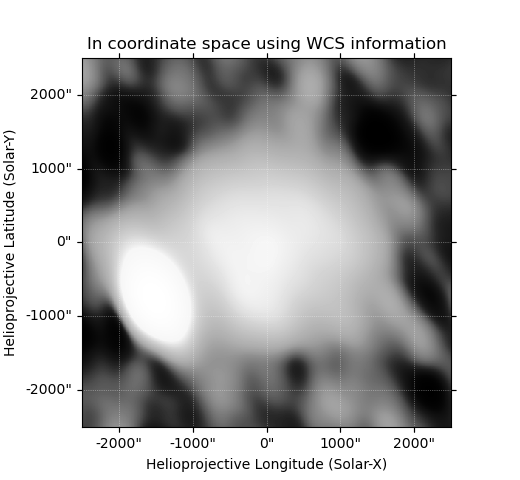
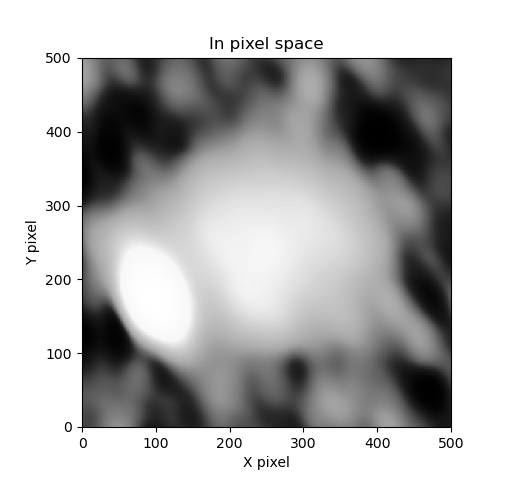
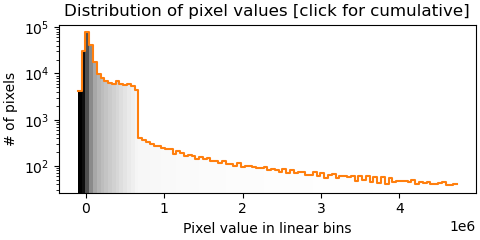
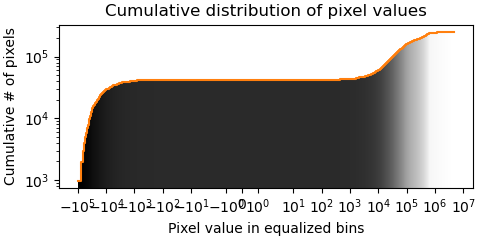

In [5]:
# show more info about the map
lofarmap

Extract the brightness temperature from the image at a certain `(x, y)` point.

In [6]:
x = 1000 # arcsec
y = 100  # arcsec

x_idx = np.argmin(np.abs(x-lofardata.xx))
y_idx = np.argmin(np.abs(y-lofardata.yy))

Tb_xy = lofardata.data_xy_calib[x_idx, y_idx]
print(f'Brightness Temperature (Tb) at ({x}, {y}) arcsec is: {Tb_xy:.2e} K')

Brightness Temperature (Tb) at (1000, 100) arcsec is: 2.95e+05 K
